In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('rheumatoid_arthritis_dataset.csv')

EDA

In [6]:
df.head()

,SEQN,RheumatoidArthritis,BRI,Gender,Age,Race,EducationLevel,MaritalStatus,FamilyIncome,PhysicalActivity,...,ProteinConsumption,CarbohydrateConsumption,FatConsumption,CaffeineConsumption,FiberConsumption,PSU,STRATA,BRI_Grp,BRI_Trend,Weight
0,62161,0,2.815371,Male,22,Non-Hispanic White,High school graduate,Living Alone,"(1.3,3.5]",Other,...,104.68,359.59,123.81,0,18.6,1,91,"[1.049, 3.666]",0,22313.349230
1,62169,0,2.017701,Male,21,Other,High school graduate,Living Alone,PIR <= 1.3,Other,...,77.46,297.51,34.61,40,4.3,1,92,"[1.049, 3.666]",0,3128.647493
2,62172,0,7.888557,Female,43,Non-Hispanic Black,High school graduate,Living Alone,"(1.3,3.5]",Sedentary,...,57.43,192.82,42.02,54,2.8,2,96,"(6.477, 20.970]",3,5861.037901
3,62176,0,3.760754,Female,34,Non-Hispanic White,Above high school,Living With A Partner,PIR > 3.5,Vigorous activity,...,144.81,281.44,112.90,197,41.9,1,99,"(3.666, 4.924]",1,11702.304220
4,62178,1,6.569817,Male,80,Non-Hispanic White,High school graduate,Living Alone,PIR <= 1.3,Other,...,48.71,302.33,79.97,17,14.0,1,95,"(6.477, 20.970]",3,2671.990112


In [7]:
df.shape

(13273, 27)

In [8]:
df.dtypes.value_counts()

object     12
int64       8
float64     7
Name: count, dtype: int64

In [9]:
df.isnull().sum()

SEQN                       0
RheumatoidArthritis        0
BRI                        0
Gender                     0
Age                        0
Race                       0
EducationLevel             0
MaritalStatus              0
FamilyIncome               0
PhysicalActivity           0
SmokingStatus              0
BMI                        0
DrinkingStatus             0
Hypertension               0
Diabetes                   0
Hyperlipidemia             0
CalorieConsumption         0
ProteinConsumption         0
CarbohydrateConsumption    0
FatConsumption             0
CaffeineConsumption        0
FiberConsumption           0
PSU                        0
STRATA                     0
BRI_Grp                    0
BRI_Trend                  0
Weight                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13273 entries, 0 to 13272
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SEQN                     13273 non-null  int64  
 1   RheumatoidArthritis      13273 non-null  int64  
 2   BRI                      13273 non-null  float64
 3   Gender                   13273 non-null  object 
 4   Age                      13273 non-null  int64  
 5   Race                     13273 non-null  object 
 6   EducationLevel           13273 non-null  object 
 7   MaritalStatus            13273 non-null  object 
 8   FamilyIncome             13273 non-null  object 
 9   PhysicalActivity         13273 non-null  object 
 10  SmokingStatus            13273 non-null  object 
 11  BMI                      13273 non-null  float64
 12  DrinkingStatus           13273 non-null  object 
 13  Hypertension             13273 non-null  object 
 14  Diabetes              

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop(columns = ['SEQN', 'PSU', 'STRATA', 'BRI_Grp', 'BRI_Trend', 'Weight', 'BMI'], inplace = True)

In [13]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RheumatoidArthritis,13273.0,0.062533,0.242130,0.000000,0.000000,0.000000,0.000000,1.000000
BRI,13273.0,5.317289,2.328315,1.048869,3.665968,4.924353,6.476923,20.970057
Age,13273.0,45.123032,16.696345,20.000000,31.000000,43.000000,58.000000,80.000000
CalorieConsumption,13273.0,2178.910872,1020.844450,0.000000,1489.000000,2006.000000,2668.000000,13687.000000
ProteinConsumption,13273.0,83.273651,44.208148,0.000000,53.630000,75.330000,103.170000,557.870000
CarbohydrateConsumption,13273.0,256.412823,127.097817,0.000000,169.470000,235.830000,317.330000,1815.020000
FatConsumption,13273.0,84.772704,48.666870,0.000000,51.420000,75.970000,108.000000,553.790000
CaffeineConsumption,13273.0,136.733218,182.296488,0.000000,9.000000,90.000000,194.000000,4320.000000
FiberConsumption,13273.0,17.074934,10.998244,0.000000,9.500000,14.700000,22.000000,136.300000


In [15]:
cols = df.columns
cols

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'ProteinConsumption', 'CarbohydrateConsumption',
       'FatConsumption', 'CaffeineConsumption', 'FiberConsumption'],
      dtype='object')

In [16]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
    print("----------------------------")
    print(col, " → ", df[col].unique())
    print(df[col].value_counts())
    print()

----------------------------
Gender  →  ['Male' 'Female']
Gender
Male      6847
Female    6426
Name: count, dtype: int64

----------------------------
Race  →  ['Non-Hispanic White' 'Other' 'Non-Hispanic Black' 'Mexican American']
Race
Non-Hispanic White    4778
Other                 3574
Non-Hispanic Black    3117
Mexican American      1804
Name: count, dtype: int64

----------------------------
EducationLevel  →  ['High school graduate' 'Above high school' 'Below high school']
EducationLevel
Above high school       7962
High school graduate    2940
Below high school       2371
Name: count, dtype: int64

----------------------------
MaritalStatus  →  ['Living Alone' 'Living With A Partner']
MaritalStatus
Living With A Partner    7845
Living Alone             5428
Name: count, dtype: int64

----------------------------
FamilyIncome  →  ['(1.3,3.5]' 'PIR <= 1.3' 'PIR > 3.5']
FamilyIncome
(1.3,3.5]     4908
PIR > 3.5     4316
PIR <= 1.3    4049
Name: count, dtype: int64

----------------

In [17]:
df['RheumatoidArthritis'].value_counts()

RheumatoidArthritis
0    12443
1      830
Name: count, dtype: int64

In [18]:
df['RheumatoidArthritis'].value_counts(normalize=True) * 100

RheumatoidArthritis
0    93.746704
1     6.253296
Name: proportion, dtype: float64

In [19]:
df[['BRI','Age','CalorieConsumption']].skew()

BRI                   1.218270
Age                   0.347654
CalorieConsumption    1.622224
dtype: float64

In [20]:
df.isna().sum()

RheumatoidArthritis        0
BRI                        0
Gender                     0
Age                        0
Race                       0
EducationLevel             0
MaritalStatus              0
FamilyIncome               0
PhysicalActivity           0
SmokingStatus              0
DrinkingStatus             0
Hypertension               0
Diabetes                   0
Hyperlipidemia             0
CalorieConsumption         0
ProteinConsumption         0
CarbohydrateConsumption    0
FatConsumption             0
CaffeineConsumption        0
FiberConsumption           0
dtype: int64

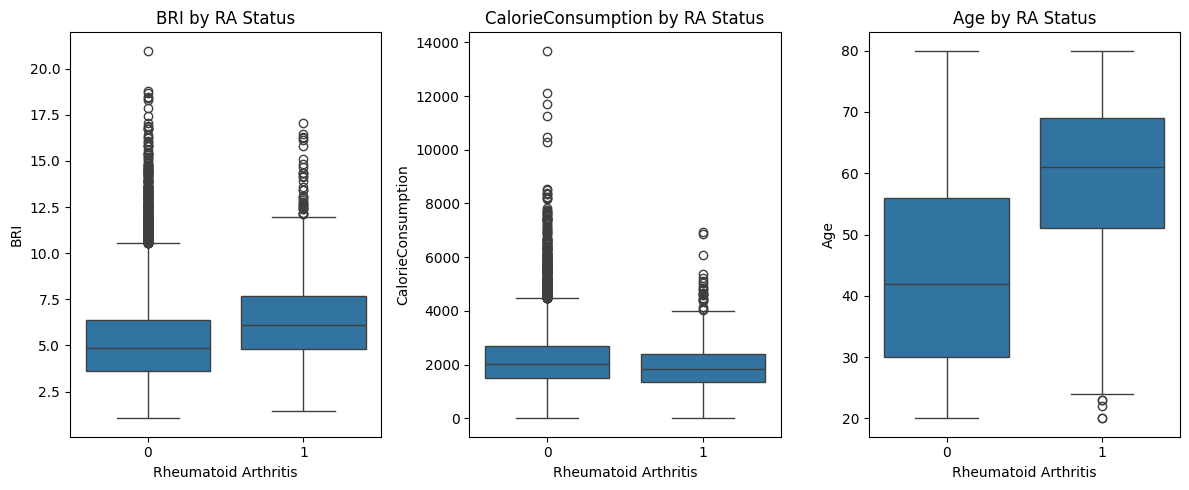

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

cols = ['BRI','CalorieConsumption', 'Age']

plt.figure(figsize=(12, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='RheumatoidArthritis', y=col)
    plt.title(f"{col} by RA Status")
    plt.xlabel("Rheumatoid Arthritis")
    plt.tight_layout()

plt.show()


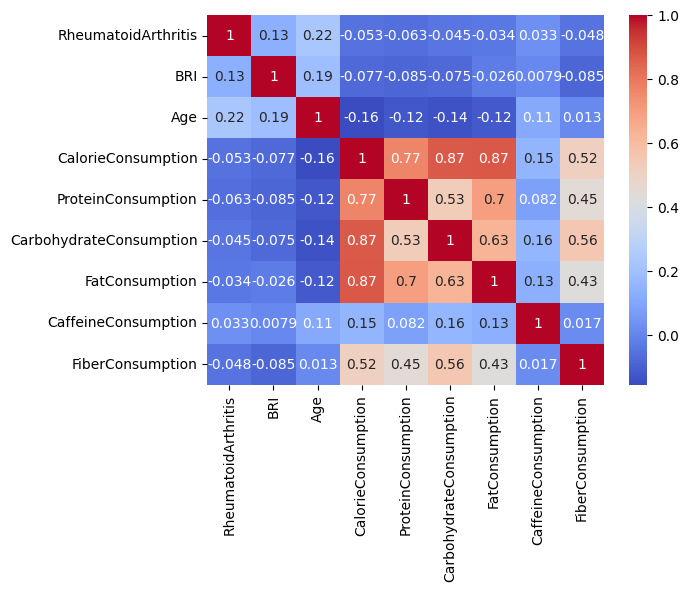

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [23]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

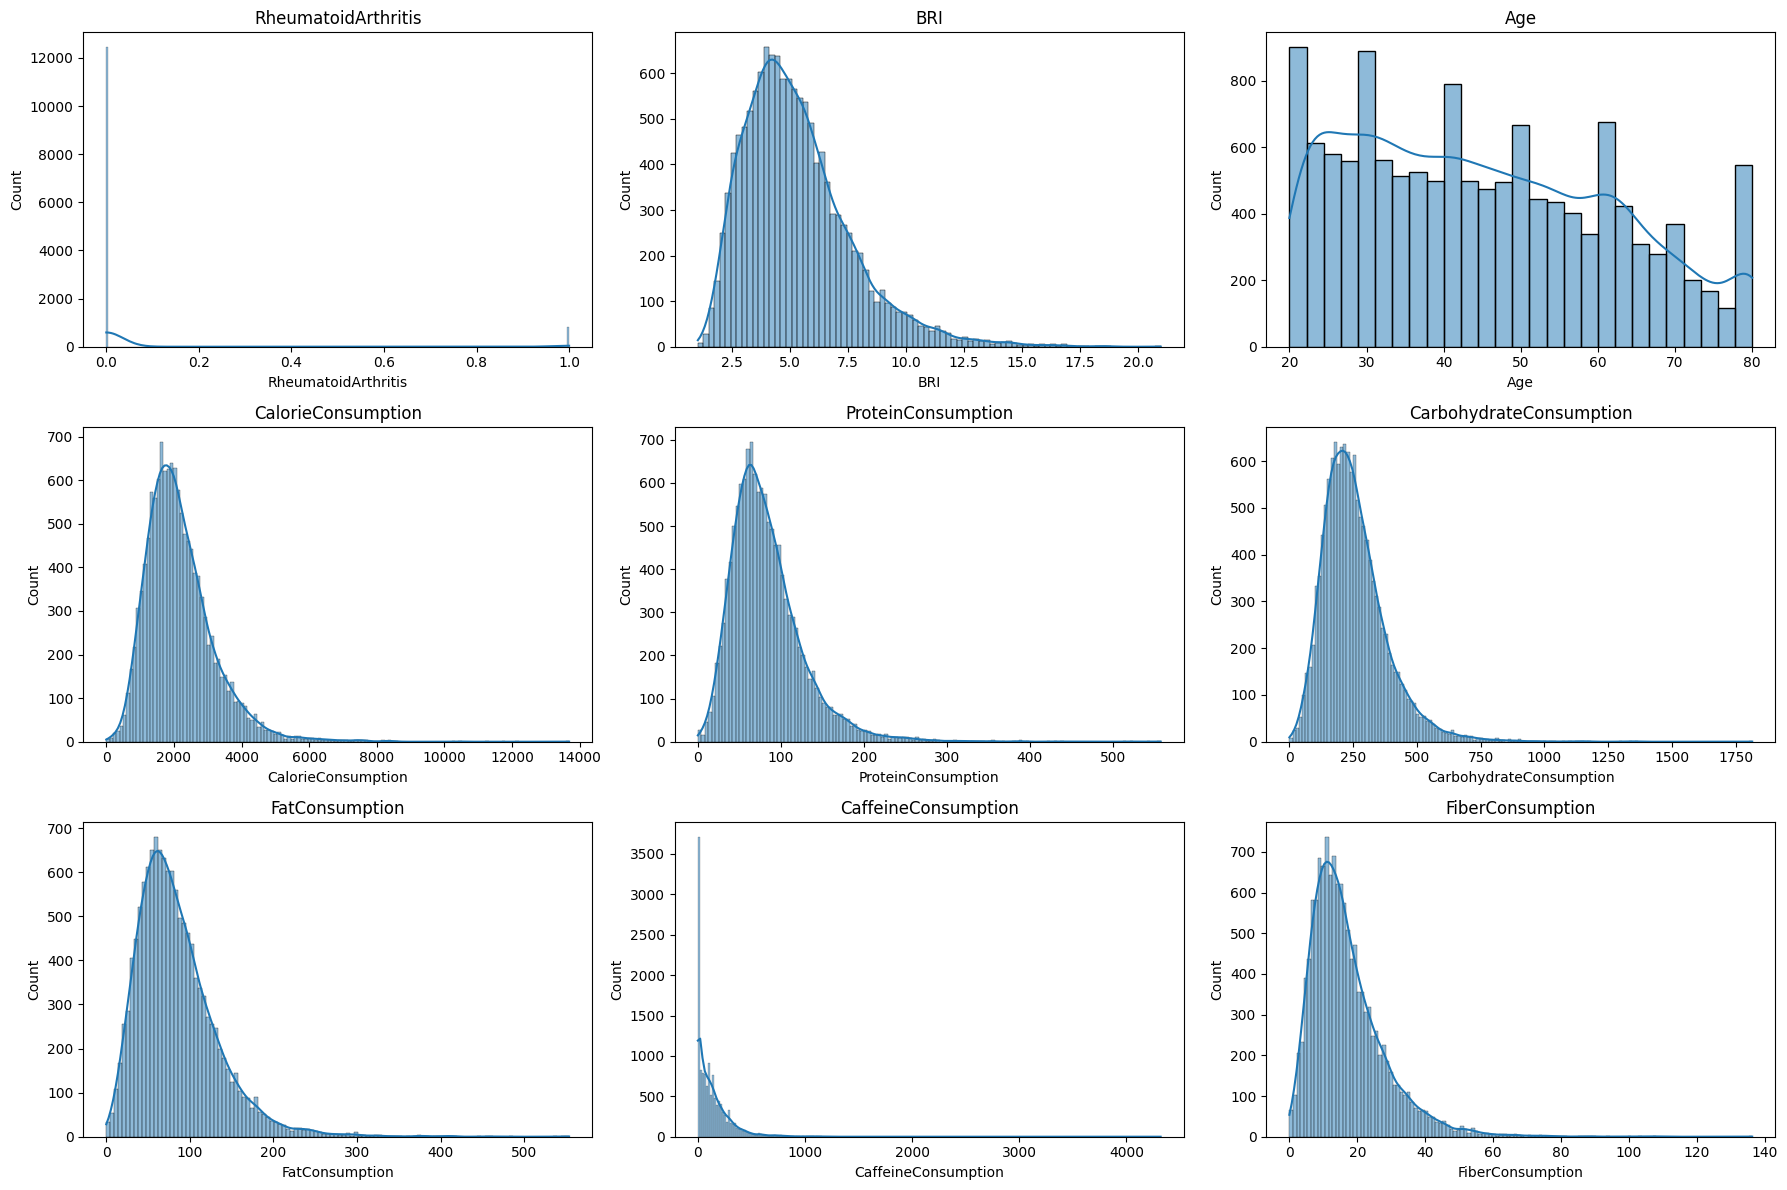

In [24]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

rows = int(np.ceil(len(num_cols) / 3))
cols = 3

plt.figure(figsize=(18, rows*4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [25]:
def outlier_summary(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers

print("\n--> Outlier counts per feature:")
for col in num_cols:
    print(f"{col}: {outlier_summary(df[col])}")


--> Outlier counts per feature:
RheumatoidArthritis: 830
BRI: 404
Age: 0
CalorieConsumption: 387
ProteinConsumption: 472
CarbohydrateConsumption: 406
FatConsumption: 393
CaffeineConsumption: 537
FiberConsumption: 488


In [26]:
df.drop(columns=['CarbohydrateConsumption','FatConsumption','ProteinConsumption','FiberConsumption'],inplace=True)

In [27]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'Race', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'PhysicalActivity', 'SmokingStatus',
       'DrinkingStatus', 'Hypertension', 'Diabetes', 'Hyperlipidemia',
       'CalorieConsumption', 'CaffeineConsumption'],
      dtype='object')

In [28]:
cat_cols = ['Gender','Race','EducationLevel','MaritalStatus','FamilyIncome',
            'PhysicalActivity','SmokingStatus','DrinkingStatus',
            'Hypertension','Diabetes','Hyperlipidemia']

for col in cat_cols:
    print(f"\n--- {col} vs RA ---")
    print(pd.crosstab(df[col], df['RheumatoidArthritis'], normalize='index'))
    


--- Gender vs RA ---
RheumatoidArthritis         0         1
Gender                                 
Female               0.926082  0.073918
Male                 0.948152  0.051848

--- Race vs RA ---
RheumatoidArthritis         0         1
Race                                   
Mexican American     0.945676  0.054324
Non-Hispanic Black   0.912095  0.087905
Non-Hispanic White   0.937212  0.062788
Other                0.955792  0.044208

--- EducationLevel vs RA ---
RheumatoidArthritis          0         1
EducationLevel                          
Above high school     0.948003  0.051997
Below high school     0.915226  0.084774
High school graduate  0.926871  0.073129

--- MaritalStatus vs RA ---
RheumatoidArthritis           0         1
MaritalStatus                            
Living Alone           0.932203  0.067797
Living With A Partner  0.941109  0.058891

--- FamilyIncome vs RA ---
RheumatoidArthritis         0         1
FamilyIncome                           
(1.3,3.5]         

In [29]:
cat_cols.remove('Race')



===== Gender vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis     0    1
Gender                        
Female               5951  475
Male                 6492  355

Row-wise Percentage:
RheumatoidArthritis          0         1
Gender                                  
Female               92.608154  7.391846
Male                 94.815248  5.184752


===== EducationLevel vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis      0    1
EducationLevel                 
Above high school     7548  414
Below high school     2170  201
High school graduate  2725  215

Row-wise Percentage:
RheumatoidArthritis           0         1
EducationLevel                           
Above high school     94.800301  5.199699
Below high school     91.522564  8.477436
High school graduate  92.687075  7.312925


===== MaritalStatus vs RheumatoidArthritis =====

Counts:
RheumatoidArthritis       0    1
MaritalStatus                   
Living Alone           5060  368
Living With A Partner  73

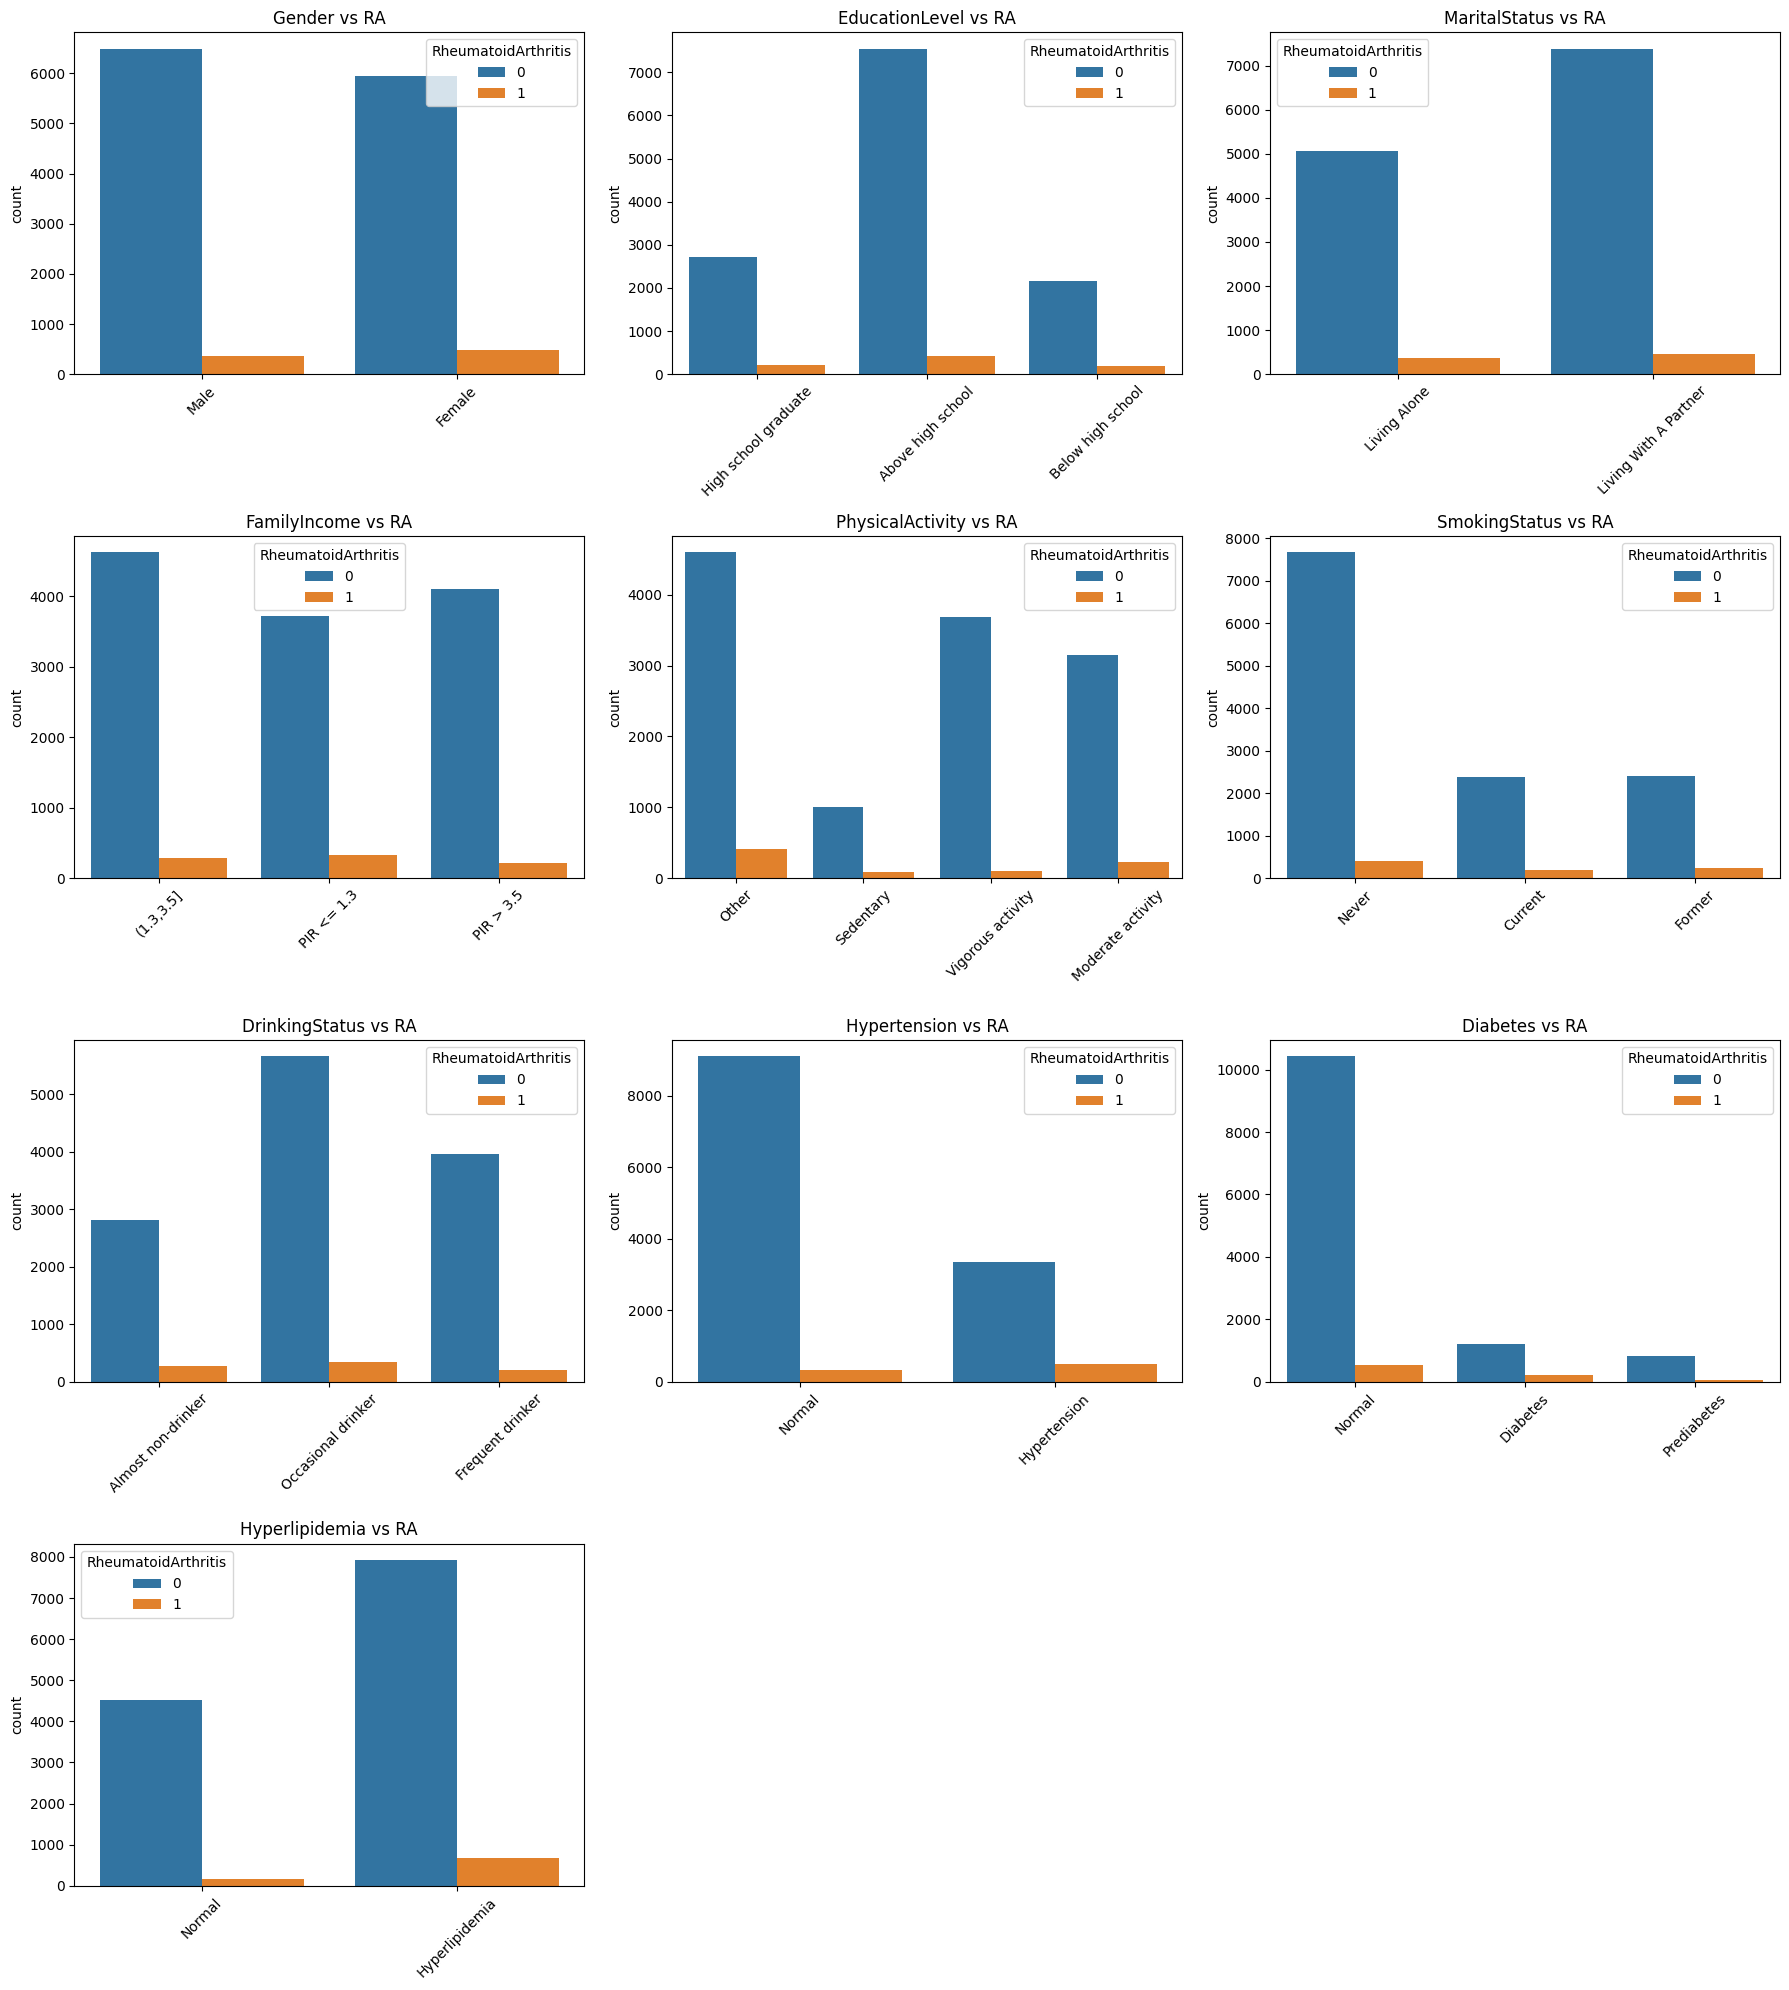

In [30]:
for col in cat_cols:
    print(f"\n\n===== {col} vs RheumatoidArthritis =====")

    # Crosstab
    ct = pd.crosstab(df[col], df['RheumatoidArthritis'])
    print("\nCounts:")
    print(ct)

    print("\nRow-wise Percentage:")
    print(ct.div(ct.sum(axis=1), axis=0) * 100)

n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='RheumatoidArthritis')
    plt.title(f"{col} vs RA")
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.tight_layout()

plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8688\1359488541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='RheumatoidArthritis', ylabel='count'>

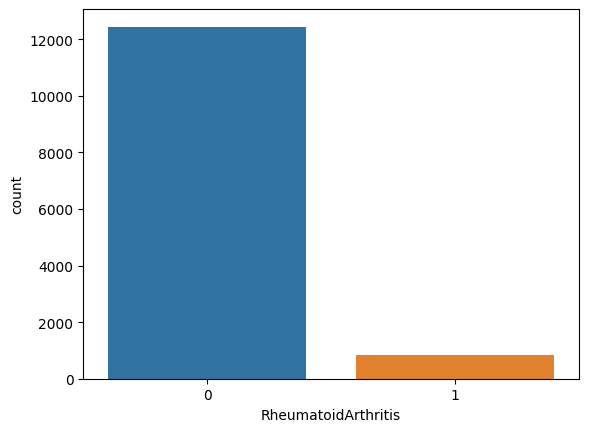

In [31]:
sns.countplot(
    data=df,
    x="RheumatoidArthritis",
    palette=["#1f77b4", "#ff7f0e"]   # specify two colors
)


Data Preprocessing and Feature Engineering

In [32]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,30,45,60,100], labels=['Young','Adult','MidAge','Old'])

df['CalorieConsumption'] = df.apply(
    lambda row: df[
        (df['Gender'] == row['Gender']) &
        (df['AgeGroup'] == row['AgeGroup'])
    ]['CalorieConsumption'].median()
    if row['CalorieConsumption'] == 0 else row['CalorieConsumption'],
    axis=1
)

We created age groups from the Age column, and replaced zero CalorieConsumption values with the median calorie intake of people from the same gender and age group to make the data more realistic.

In [33]:
Q1 = df['CalorieConsumption'].quantile(0.25)
Q3 = df['CalorieConsumption'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['CalorieConsumption'].quantile(0.995))

df['CalorieConsumption'] = df['CalorieConsumption'].clip(lower=800, upper=upper)

In [34]:
Q1 = df['BRI'].quantile(0.25)
Q3 = df['BRI'].quantile(0.75)
IQR = Q3 - Q1
upper = min(Q3 + 1.5*IQR, df['BRI'].quantile(0.995))

df['BRI'] = df['BRI'].clip(lower=1.0, upper=upper)

In [35]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df['MaritalStatus'] = df['MaritalStatus'].map({'Living Alone':0,'Living With A Partner':1})
df['Hypertension'] = df['Hypertension'].map({'Normal':0,'Hypertension':1})
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'Normal':0,'Hyperlipidemia':1})

In [36]:
df['EducationLevel'] = df['EducationLevel'].map({
    'Below high school':0,
    'High school graduate':1,
    'Above high school':2
})

In [37]:
df['Diabetes'] = df['Diabetes'].map({'Normal':0,'Prediabetes':1,'Diabetes':2})

In [38]:
df['SmokingStatus'] = df['SmokingStatus'].map({'Never':0,'Former':1,'Current':2})

In [39]:
df['DrinkingStatus'] = df['DrinkingStatus'].map({
    'Almost non-drinker':2,
    'Occasional drinker':1,
    'Frequent drinker':0
})

In [40]:
df['FamilyIncome'] = df['FamilyIncome'].map({
    'PIR <= 1.3':0,
    '(1.3,3.5]':1,
    'PIR > 3.5':2
})

In [41]:
df = pd.get_dummies(df, columns=['Race','PhysicalActivity'], drop_first=True)

In [42]:
df.columns

Index(['RheumatoidArthritis', 'BRI', 'Gender', 'Age', 'EducationLevel',
       'MaritalStatus', 'FamilyIncome', 'SmokingStatus', 'DrinkingStatus',
       'Hypertension', 'Diabetes', 'Hyperlipidemia', 'CalorieConsumption',
       'CaffeineConsumption', 'AgeGroup', 'Race_Non-Hispanic Black',
       'Race_Non-Hispanic White', 'Race_Other', 'PhysicalActivity_Other',
       'PhysicalActivity_Sedentary', 'PhysicalActivity_Vigorous activity'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13273 entries, 0 to 13272
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   RheumatoidArthritis                 13273 non-null  int64   
 1   BRI                                 13273 non-null  float64 
 2   Gender                              13273 non-null  int64   
 3   Age                                 13273 non-null  int64   
 4   EducationLevel                      13273 non-null  int64   
 5   MaritalStatus                       13273 non-null  int64   
 6   FamilyIncome                        13273 non-null  int64   
 7   SmokingStatus                       13273 non-null  int64   
 8   DrinkingStatus                      13273 non-null  int64   
 9   Hypertension                        13273 non-null  int64   
 10  Diabetes                            13273 non-null  int64   
 11  Hyperlipidemia              

Model 1 - Logistic Regression

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------- 1. Split features & target ----------
# Target
y = df['RheumatoidArthritis']

# Features: drop target column
X = df.drop(columns=['RheumatoidArthritis'])

# ---------- 2. Make everything numeric ----------

# (a) Convert bool columns to int (0/1)
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype('int64')

# (b) One-hot encode categorical / object / category columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape after encoding:", X.shape)

# ---------- 3. Train–test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- 4. Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ---------- 5. Logistic Regression model ----------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# ---------- 6. Predictions ----------
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred  = log_reg.predict(X_test_scaled)

# ---------- 7. Accuracies ----------
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy : {train_acc:.4f}")
print(f"Test Accuracy     : {test_acc:.4f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))


Shape after encoding: (13273, 22)
Training Accuracy : 0.9375
Test Accuracy     : 0.9379

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2489
           1       0.67      0.01      0.02       166

    accuracy                           0.94      2655
   macro avg       0.80      0.51      0.50      2655
weighted avg       0.92      0.94      0.91      2655


Confusion Matrix (Test Data):
[[2488    1]
 [ 164    2]]


Logistic Regression with class-weight 

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------- 1. Split features & target ----------
y = df['RheumatoidArthritis']
X = df.drop(columns=['RheumatoidArthritis'])

# ---------- 2. Make everything numeric ----------
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype('int64')

cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape after encoding:", X.shape)

# ---------- 3. Train–test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- 4. Scaling ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ---------- 5. Logistic Regression with class weights ----------
log_reg_bal = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'   # <-- handles imbalance
)
log_reg_bal.fit(X_train_scaled, y_train)

# ---------- 6. Predictions ----------
y_train_pred_bal = log_reg_bal.predict(X_train_scaled)
y_test_pred_bal  = log_reg_bal.predict(X_test_scaled)

# ---------- 7. Metrics ----------
train_acc_bal = accuracy_score(y_train, y_train_pred_bal)
test_acc_bal  = accuracy_score(y_test, y_test_pred_bal)

print("=== Logistic Regression (class_weight='balanced') ===")
print(f"Training Accuracy : {train_acc_bal:.4f}")
print(f"Test Accuracy     : {test_acc_bal:.4f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_bal))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred_bal))


Shape after encoding: (13273, 22)
=== Logistic Regression (class_weight='balanced') ===
Training Accuracy : 0.7057
Test Accuracy     : 0.6927

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      2489
           1       0.14      0.75      0.23       166

    accuracy                           0.69      2655
   macro avg       0.56      0.72      0.52      2655
weighted avg       0.92      0.69      0.77      2655


Confusion Matrix (Test Data):
[[1714  775]
 [  41  125]]


Original class distribution in y_train:
RheumatoidArthritis
0    9954
1     664
Name: count, dtype: int64

After SMOTE class distribution in y_train_smote:
RheumatoidArthritis
0    9954
1    9954
Name: count, dtype: int64

=== Logistic Regression with SMOTE ===
Training Accuracy : 0.9045
Test Accuracy     : 0.8539

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2489
           1       0.13      0.23      0.17       166

    accuracy                           0.85      2655
   macro avg       0.54      0.57      0.54      2655
weighted avg       0.90      0.85      0.87      2655


Confusion Matrix (Test Data):
[[2228  261]
 [ 127   39]]


Model 2 - Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_clf = DecisionTreeClassifier(
    max_depth=5,              # you can tune this
    min_samples_split=50,
    class_weight='balanced',  # handle imbalance
    random_state=42
)

dt_clf.fit(X_train, y_train)

y_train_pred_dt = dt_clf.predict(X_train)
y_test_pred_dt  = dt_clf.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_pred_dt)
test_acc_dt  = accuracy_score(y_test, y_test_pred_dt)

print("=== Decision Tree (class_weight='balanced') ===")
print(f"Training Accuracy : {train_acc_dt:.4f}")
print(f"Test Accuracy     : {test_acc_dt:.4f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_dt))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred_dt))


=== Decision Tree (class_weight='balanced') ===
Training Accuracy : 0.6847
Test Accuracy     : 0.6508

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.65      0.78      2489
           1       0.11      0.67      0.19       166

    accuracy                           0.65      2655
   macro avg       0.54      0.66      0.49      2655
weighted avg       0.91      0.65      0.74      2655


Confusion Matrix (Test Data):
[[1616  873]
 [  54  112]]


In [58]:
!pip install xgboost lightgbm catboost


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
    --------------------------------------- 1.6/102.4 MB 8.0 MB/s eta 0:00:13
   - -------------------------------------- 3.7/102.4 MB 9.1 MB/s eta 0:00:11
   -- ------------------------------------- 5.2/102.4 MB 8.9 MB/s eta 0:00:11
   -- ------------------------------------- 7.3/102.4 MB 9.1 MB/s eta 0:00:11
   --- ------------------------------------ 9.2/102.4 MB 9.1 MB/s eta 0:00:11
   ---- ----------------------------------- 11.5/102.4 MB 9.3 MB/s eta 0:00:10
   ----- ---------------------------------- 13.4/102.4 MB 9.3 MB/s eta 0:00:10
   ----- ---------------------------------- 14.9/102.4 MB 9.0 MB/s eta 0:00:10
   ------ --------------------------------- 16.5/102.4 MB 8.9 MB/s eta 0:00:10
  


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# ---- Target and features ----
y = df['RheumatoidArthritis']
X = df.drop(columns=['RheumatoidArthritis'])

# ---- Make everything numeric ----
# (a) bool → int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype('int64')

# (b) categorical / object / category → one-hot
cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("Shape after encoding:", X.shape)

# ---- Train–test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Class imbalance ratio for weighting ----
class_counts = y_train.value_counts()
neg, pos = class_counts[0], class_counts[1]
scale_pos = neg / pos
print("Class counts in y_train:\n", class_counts)
print("scale_pos_weight:", scale_pos)


Shape after encoding: (13273, 22)
Class counts in y_train:
 RheumatoidArthritis
0    9954
1     664
Name: count, dtype: int64
scale_pos_weight: 14.990963855421686


Model 3 - Xg Boost

In [60]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=scale_pos,   # handle imbalance
    random_state=42,
    n_jobs=-1
)

xgb_clf.fit(X_train, y_train)

# predictions (labels)
y_train_pred_xgb = xgb_clf.predict(X_train)
y_test_pred_xgb  = xgb_clf.predict(X_test)

# metrics
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb  = accuracy_score(y_test, y_test_pred_xgb)

print("=== XGBoost Classifier ===")
print(f"Training Accuracy : {train_acc_xgb:.4f}")
print(f"Test Accuracy     : {test_acc_xgb:.4f}")

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred_xgb))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred_xgb))

# ROC-AUC
y_test_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)
print(f"\nROC-AUC Score     : {roc_auc_xgb:.4f}")


=== XGBoost Classifier ===
Training Accuracy : 0.8112
Test Accuracy     : 0.7706

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2489
           1       0.15      0.57      0.24       166

    accuracy                           0.77      2655
   macro avg       0.56      0.68      0.55      2655
weighted avg       0.91      0.77      0.83      2655


Confusion Matrix (Test Data):
[[1951  538]
 [  71   95]]

ROC-AUC Score     : 0.7603
